In [1]:
# Importing the libraries 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True) 
# Load the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import missingno as msno
import re
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')


from scipy.stats.mstats import winsorize
import scipy.stats as stats
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)

from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing


In [2]:
df_ireland = pd.read_csv('FAOSTAT_data_ireland.csv')
# looking at the dataset
df_ireland.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01371,"Almonds, in shell",2018,2018,ha,0.0,A,Official figure
1,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01371,"Almonds, in shell",2019,2019,ha,0.0,A,Official figure
2,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01371,"Almonds, in shell",2020,2020,ha,0.0,A,Official figure
3,QCL,Crops and livestock products,372,Ireland,5510,Production,01371,"Almonds, in shell",2018,2018,tonnes,0.0,A,Official figure
4,QCL,Crops and livestock products,372,Ireland,5510,Production,01371,"Almonds, in shell",2019,2019,tonnes,0.0,A,Official figure


In [3]:
df_ukraine = pd.read_csv('FAOSTAT_data_Ukraine.csv')
df_ukraine.head()


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,804,Ukraine,5312,Area harvested,01371,"Almonds, in shell",1992,1992,ha,3500.0,E,Estimated value
1,QCL,Crops and livestock products,804,Ukraine,5312,Area harvested,01371,"Almonds, in shell",1993,1993,ha,3760.0,I,Imputed value
2,QCL,Crops and livestock products,804,Ukraine,5312,Area harvested,01371,"Almonds, in shell",1994,1994,ha,3825.0,I,Imputed value
3,QCL,Crops and livestock products,804,Ukraine,5312,Area harvested,01371,"Almonds, in shell",1995,1995,ha,3000.0,E,Estimated value
4,QCL,Crops and livestock products,804,Ukraine,5312,Area harvested,01371,"Almonds, in shell",1996,1996,ha,5000.0,T,Unofficial figure


In [4]:
df_ukraine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10291 entries, 0 to 10290
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       10291 non-null  object 
 1   Domain            10291 non-null  object 
 2   Area Code (M49)   10291 non-null  int64  
 3   Area              10291 non-null  object 
 4   Element Code      10291 non-null  int64  
 5   Element           10291 non-null  object 
 6   Item Code (CPC)   10291 non-null  object 
 7   Item              10291 non-null  object 
 8   Year Code         10291 non-null  int64  
 9   Year              10291 non-null  int64  
 10  Unit              10291 non-null  object 
 11  Value             9661 non-null   float64
 12  Flag              10291 non-null  object 
 13  Flag Description  10291 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 1.1+ MB


In [5]:
df_ireland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9751 entries, 0 to 9750
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       9751 non-null   object 
 1   Domain            9751 non-null   object 
 2   Area Code (M49)   9751 non-null   int64  
 3   Area              9751 non-null   object 
 4   Element Code      9751 non-null   int64  
 5   Element           9751 non-null   object 
 6   Item Code (CPC)   9751 non-null   object 
 7   Item              9751 non-null   object 
 8   Year Code         9751 non-null   int64  
 9   Year              9751 non-null   int64  
 10  Unit              9751 non-null   object 
 11  Value             9181 non-null   float64
 12  Flag              9751 non-null   object 
 13  Flag Description  9751 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 1.0+ MB


<AxesSubplot:>

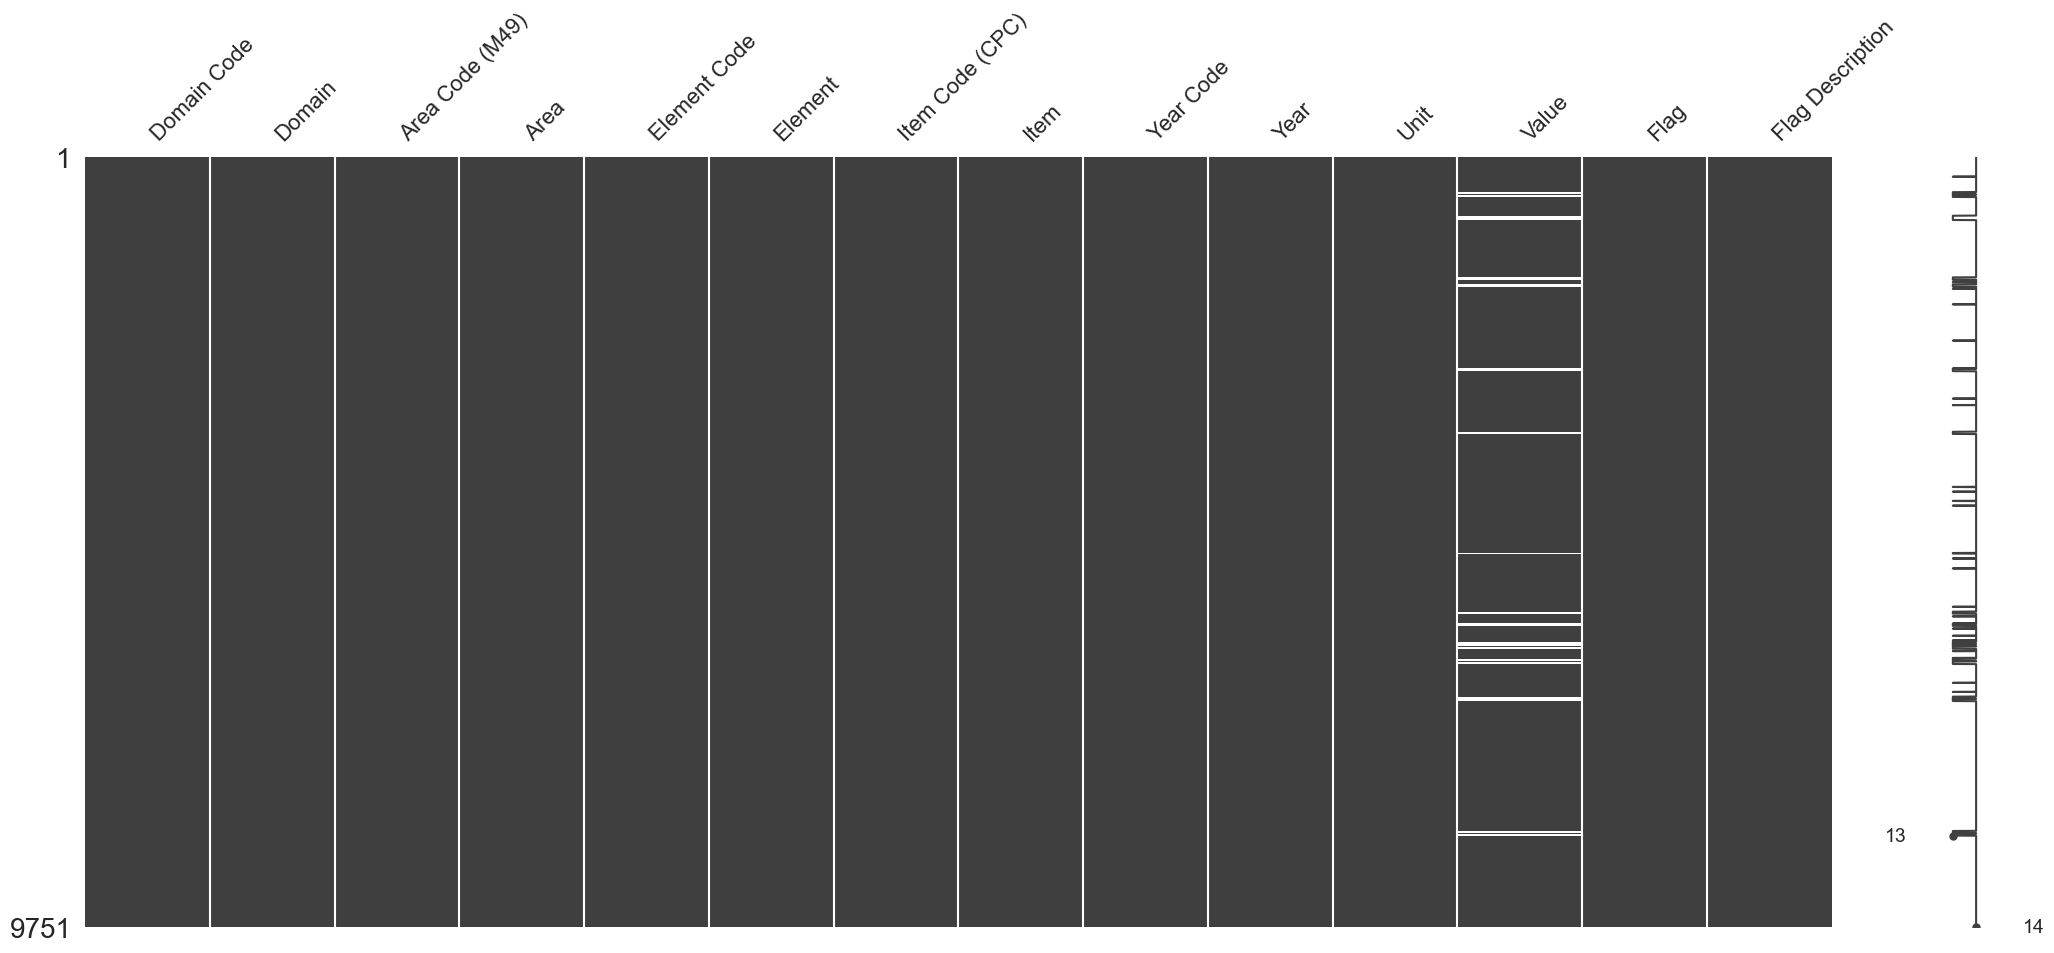

In [6]:
msno.matrix(df_ireland) 

In [7]:
df_ireland.isnull().sum()

Domain Code           0
Domain                0
Area Code (M49)       0
Area                  0
Element Code          0
Element               0
Item Code (CPC)       0
Item                  0
Year Code             0
Year                  0
Unit                  0
Value               570
Flag                  0
Flag Description      0
dtype: int64

In [8]:
df_ireland = df_ireland.dropna()
df_ireland.isnull().sum()

Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Item Code (CPC)     0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

<AxesSubplot:>

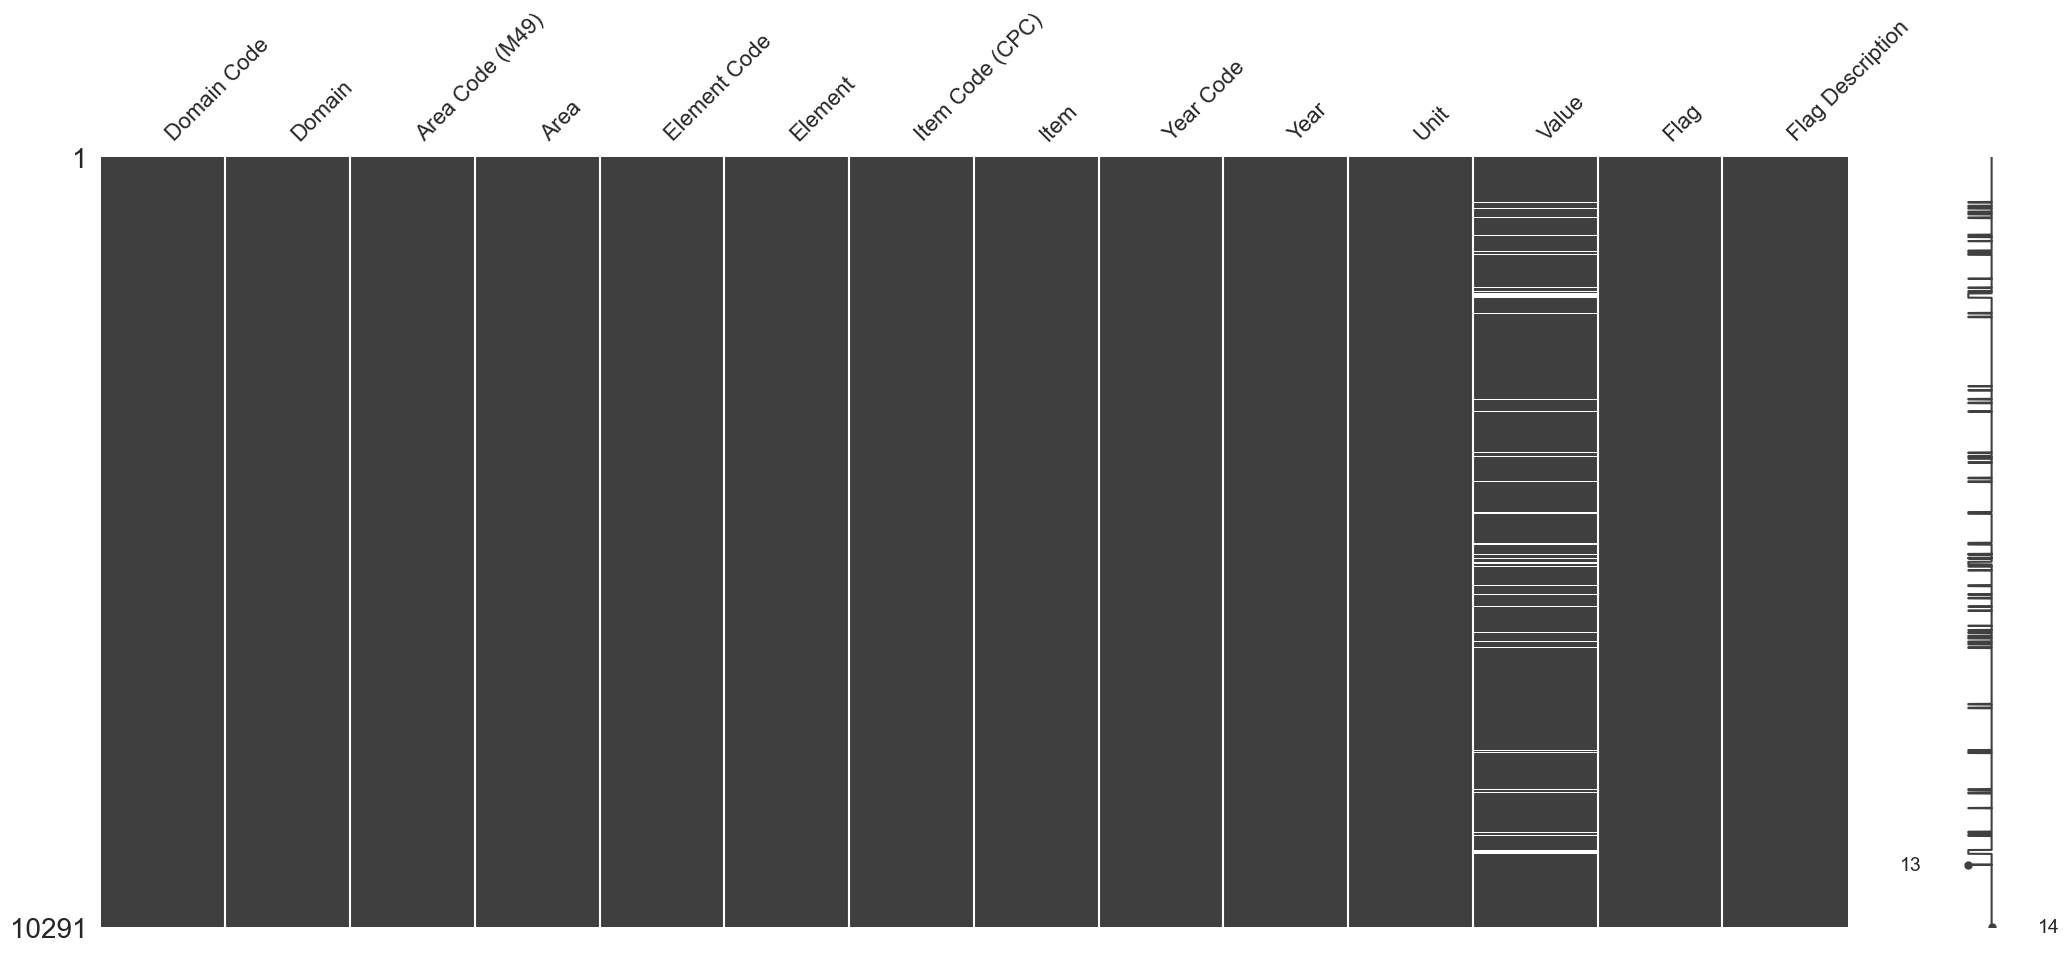

In [9]:
msno.matrix(df_ukraine) 

In [10]:
df_ukraine = df_ukraine.dropna()
df_ukraine.isnull().sum()

Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Item Code (CPC)     0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64